In [34]:
import os
import sys
import copy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from models.singly_constrained.spatial_interaction_model import SpatialInteraction

# Get current working directory and project root directory
cwd = os.getcwd()
rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0])
if not rd.endswith('stochastic-travel-demand-modelling'):
    rd = os.path.join(cwd.split('stochastic-travel-demand-modelling/', 1)[0],'stochastic-travel-demand-modelling')

if rd not in sys.path:
    sys.path.append(rd)

# Import data

In [35]:
dataset = 'commuter_ward'

In [69]:
# Import commuter Borough to Borough data
cost_matrix = np.loadtxt(os.path.join(rd,f'data/input/{dataset}/cost_matrix.txt'))
origin_supply = np.loadtxt(os.path.join(rd,f'./data/input/{dataset}/origin_supply.txt'))
initial_destination_sizes = np.loadtxt(os.path.join(rd,f'./data/input/{dataset}/initial_destination_sizes.txt'))

o = origin_supply/np.sum(origin_supply)
c = cost_matrix/np.sum(cost_matrix)
xd = np.log(initial_destination_sizes/np.sum(initial_destination_sizes))

orig_locs = np.loadtxt(os.path.join(rd,f'./data/input/{dataset}/origin_locations.txt'))
dest_locs = np.loadtxt(os.path.join(rd,f'./data/input/{dataset}/destination_locations.txt'))

N,M = cost_matrix.shape

alpha = 1.2
beta = 1400
delta = np.min(np.exp(xd))
gamma = 100
kappa = 1 + delta*M
epsilon = 1
theta = np.array([alpha,beta,delta,gamma,kappa,epsilon])

In [70]:
np.min(np.exp(xd))

0.01178781925343811

In [71]:
np.min(cost_matrix)

0.03624043372875424

In [72]:
np.max(cost_matrix)

0.8476181560889813

true_beta 35630.56305630563
min cost contribution 0.037141217816547833
max cost contribution 0.868666998947804


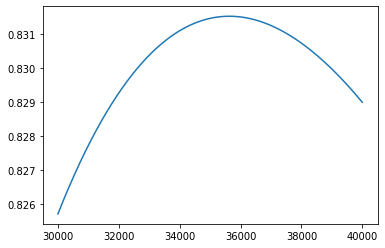

In [73]:
trials = np.linspace(30000,40000,10000)
y = [np.max(np.exp(-c*x))-np.min(np.exp(-c*x)) for x in trials]

plt.plot(trials,y)

true_beta = trials[np.argmax(y)]
print('true_beta',true_beta)

print('min cost contribution',np.min(np.exp(-c*true_beta)))
print('max cost contribution',np.max(np.exp(-c*true_beta)))

# Visualise destination sizes

In [74]:
# Set plot params
latent_factor = 1000
actual_factor = 10000

In [75]:
xdhat = np.array([-5.1897801 , -5.23642623, -5.4009969 , -5.12936143, -5.45127185,
       -4.52849762, -4.34934874, -5.31418112, -5.21250051, -5.41850884,
       -5.18537558, -4.63007369, -4.76650644, -4.87568667, -5.34561429,
       -5.51060864, -5.67272346, -5.51273392, -4.65328199, -4.36501201,
       -5.61081968, -4.70222637, -4.93021163, -5.27901482, -4.84244201,
       -5.43335431, -5.18788226, -4.43311806, -5.30968679, -4.66790956,
       -5.16315853, -4.78427364, -4.39252913])

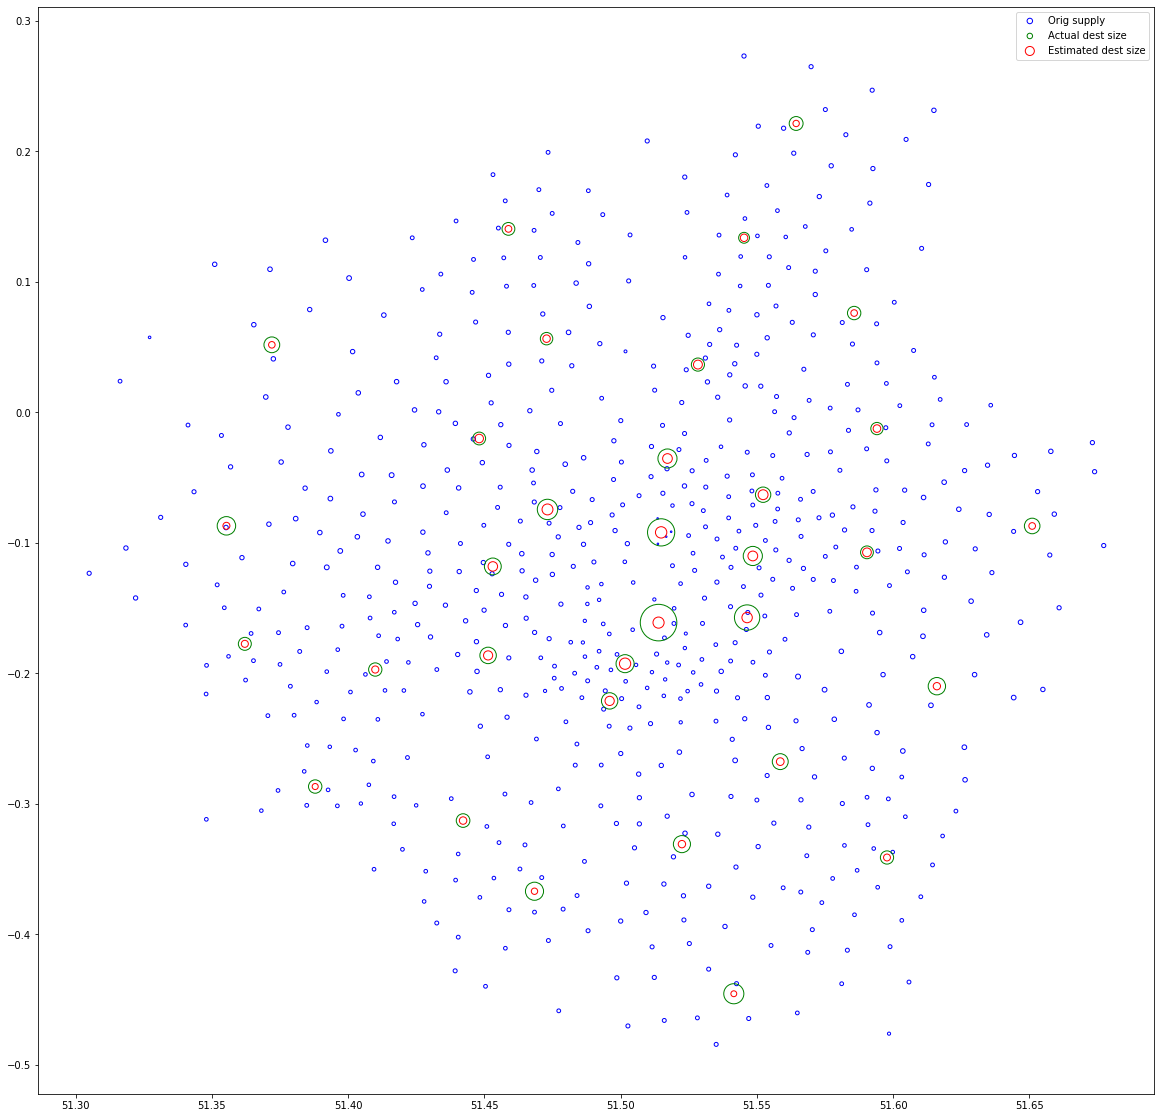

In [76]:
plt.figure(figsize=(20,20))
plt.scatter(orig_locs[:, 1], orig_locs[:, 0], facecolor="None",edgecolors='b', s=actual_factor*o, alpha=1,label='Orig supply')
plt.scatter(dest_locs[:, 1], dest_locs[:, 0], facecolor="None",edgecolors='g', s=actual_factor*np.exp(xd), alpha=1,label='Actual dest size')
plt.scatter(dest_locs[:, 1], dest_locs[:, 0], facecolor="None",edgecolors='r', s=actual_factor*np.exp(xdhat), alpha=1,label='Estimated dest size')
# Plot legend.
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Check convexity

In [99]:
def is_pos_semidef(M):
    return np.all(np.linalg.eigvals(M) >= 0)

def convexity_test(M):
    
    if is_pos_semidef(M):
        print('Potential function is convex.')
        return True
    else:
        print(f'alpha = {theta[0]}')
        print('Potential function is NOT convex.')
        return False

In [104]:
si = SpatialInteraction(dataset)
si.normalise_data()

# Get destination sizes
xd = si.normalised_initial_destination_sizes

theta[0] = 1.01
theta[1] = 0.04

# Get hessian
hessian = si.potential_hessian(xd,theta)

# Run convexity test
convexity_test(hessian)

Potential function is convex.


True